# Ejercicio: Análisis de Sentimientos y Visualización de Palabras Clave de Reseñas

Objetivo: Analizar un conjunto de reseñas para determinar la polaridad (positiva o negativa) de cada una y visualizar las palabras más frecuentes en las reseñas positivas y negativas.

Datos: Utilizarás un conjunto de reseñas ficticias o puedes descargar un conjunto de datos de reseñas desde una fuente en línea.

Tareas:
1. Usar Pandas para cargar y manejar el conjunto de datos.
2. Utilizar TextBlob para realizar el análisis de sentimientos de cada reseña.
3. Aplicar NLTK para el procesamiento del lenguaje (tokenización y eliminación de stopwords).
4. Crear dos nubes de palabras con WordCloud: una para reseñas positivas y otra para negativas.

In [1]:
# Importar bibliotecas
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Descargar stopwords de NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/n.c.rodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Paso 1: Uso de pandas para cargar el conjunto de datos
df_reviews = pd.read_csv("IMDB Dataset.csv")

#Eliminación de la columna 'sentiment' ya que se quiere crearla de nuevo
df_reviews = df_reviews.drop(columns='sentiment')
df_reviews.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [16]:
# Paso 2: Análisis de sentimiento con TextBlob

# Paso 2: Análisis de Sentimientos con TextBlob
df_reviews['sentiment_numeric'] = df_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_reviews['sentiment'] = df_reviews['sentiment_numeric'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df_reviews.head()

,review,sentiment_numeric,sentiment
0,One of the other reviewers has mentioned that ...,0.023433,positive
1,A wonderful little production. <br /><br />The...,0.109722,positive
2,I thought this was a wonderful way to spend ti...,0.354008,positive
3,Basically there's a family where a little boy ...,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.217952,positive


In [21]:
# Paso 3: Procesamiento del lenguaje con NLTK
stop_words = set(stopwords.words('english'))  

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df_reviews['processed_review'] = df_reviews['review'].apply(preprocess_text)
df_reviews.head()

,review,sentiment_numeric,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,0.023433,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,0.109722,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,0.354008,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,-0.057813,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.217952,positive,petter mattei love time money visually stunnin...


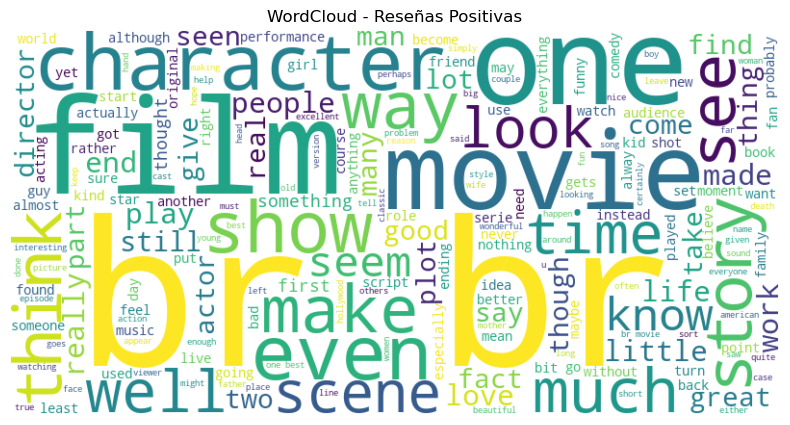

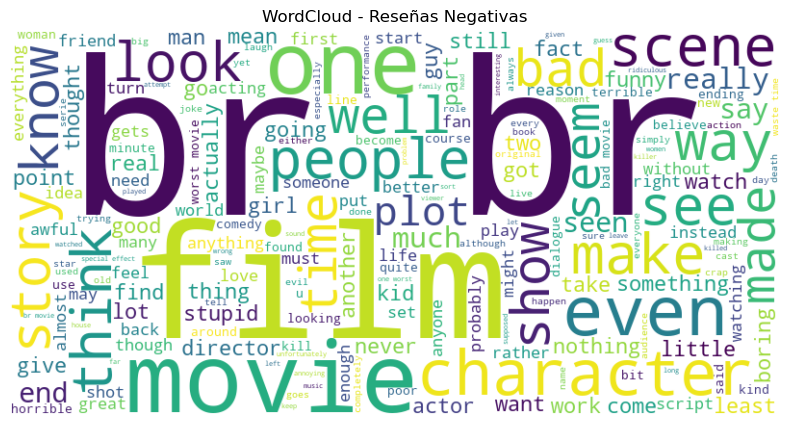

In [19]:
# Paso 4: Crear nubes de palabras con WordCloud
positive_reviews = ' '.join(df_reviews[df_reviews['sentiment_numeric'] > 0]['processed_review'])
negative_reviews = ' '.join(df_reviews[df_reviews['sentiment_numeric'] < 0]['processed_review'])

# Nube de palabras para reseñas positivas
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Reseñas Positivas')
plt.show()

# Nube de palabras para reseñas negativas
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Reseñas Negativas')
plt.show()